## Heart Disease Dataset

Importing libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

1.Load the dataset

In [15]:
df = pd.read_csv("/Users/emirhanozcan/Desktop/Makine Öğrenmesi/Heart-Disease-Dataset/heart.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


2.Separating independent variables (X) and dependent variables (y)

In [16]:
X = df.iloc[:,:-1].values 
y= df.iloc[:,-1].values

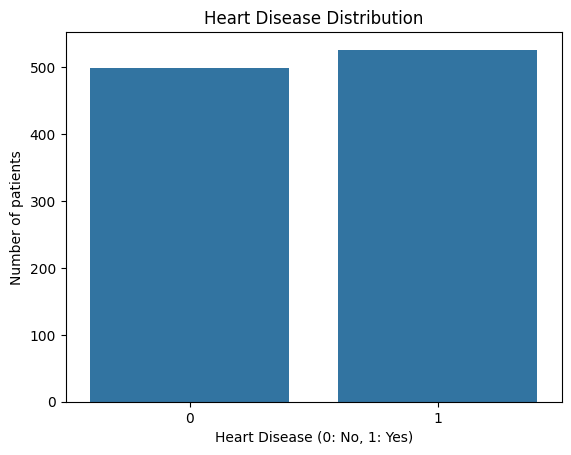

In [17]:
import seaborn as sns
sns.countplot(x=df["target"])
plt.xlabel("Heart Disease (0: No, 1: Yes)")
plt.ylabel("Number of patients")
plt.title("Heart Disease Distribution")
plt.show()

3.Filling in missing data (with SimpleImputer)



In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X[:,1:])
X[:,1:]=imputer.transform(X[:,1:])
print("Random 10 rows of X after filling in missing data:")
print(pd.DataFrame(X).sample(10))
print("\nDependent variable (y) 10 values:")
print(y[:10])

First 10 rows of X after filling in missing data:
       0    1    2      3      4    5    6      7    8    9    10   11   12
642  64.0  1.0  0.0  128.0  263.0  0.0  1.0  105.0  1.0  0.2  1.0  1.0  3.0
193  69.0  1.0  3.0  160.0  234.0  1.0  0.0  131.0  0.0  0.1  1.0  1.0  2.0
129  57.0  1.0  0.0  140.0  192.0  0.0  1.0  148.0  0.0  0.4  1.0  0.0  1.0
261  54.0  1.0  2.0  150.0  232.0  0.0  0.0  165.0  0.0  1.6  2.0  0.0  3.0
327  57.0  1.0  0.0  150.0  276.0  0.0  0.0  112.0  1.0  0.6  1.0  1.0  1.0
472  58.0  0.0  0.0  130.0  197.0  0.0  1.0  131.0  0.0  0.6  1.0  0.0  2.0
391  45.0  1.0  3.0  110.0  264.0  0.0  1.0  132.0  0.0  1.2  1.0  0.0  3.0
577  70.0  1.0  0.0  130.0  322.0  0.0  0.0  109.0  0.0  2.4  1.0  3.0  2.0
989  71.0  0.0  1.0  160.0  302.0  0.0  1.0  162.0  0.0  0.4  2.0  2.0  2.0
831  58.0  1.0  1.0  125.0  220.0  0.0  1.0  144.0  0.0  0.4  1.0  4.0  3.0

Dependent variable (y) 10 values:
[0 0 0 0 0 1 0 0 0 0]


4.Checking for missing data

In [19]:
print("\nData control after filling")
print(df.isnull().sum())


Data control after filling
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


5.Coding dependent and independent variables

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 0 1 0]


6.View Basic Statistics

In [21]:
print(df.describe())


               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

7.Disease Distribution by Age Groups

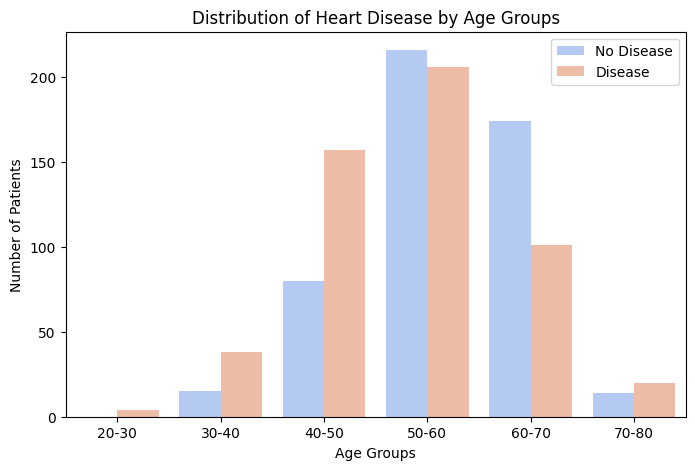

In [22]:
import seaborn as sns
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8,5))
sns.countplot(x='Age Group', hue='target', data=df, palette='coolwarm')
plt.title('Distribution of Heart Disease by Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Number of Patients')
plt.legend(['No Disease', 'Disease'])
plt.show()

8.Splitting the dataaset into the Training set and Test set

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train[:3])
print(X_test[:3])
print(y_train[:3])
print(y_test[:3])

[[ 57.    1.    0.  132.  207.    0.    1.  168.    1.    0.    2.    0.
    3. ]
 [ 59.    1.    3.  134.  204.    0.    1.  162.    0.    0.8   2.    2.
    2. ]
 [ 62.    0.    0.  150.  244.    0.    1.  154.    1.    1.4   1.    0.
    2. ]]
[[ 60.    1.    0.  117.  230.    1.    1.  160.    1.    1.4   2.    2.
    3. ]
 [ 51.    0.    2.  130.  256.    0.    0.  149.    0.    0.5   2.    0.
    2. ]
 [ 42.    1.    1.  120.  295.    0.    1.  162.    0.    0.    2.    0.
    2. ]]
[1 0 0]
[0 1 1]


9.Training the Simple Logistic Regression model on the Training set

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy rate: {accuracy * 100 :.2f}%")
conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy rate: 80.49%
Confusion Matrix:
[[80 29]
 [11 85]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


    10.Visualing the Training set results 

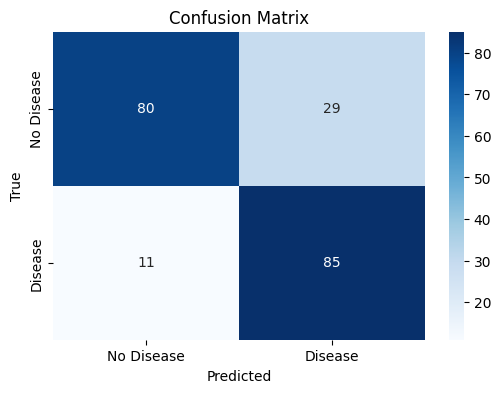

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

